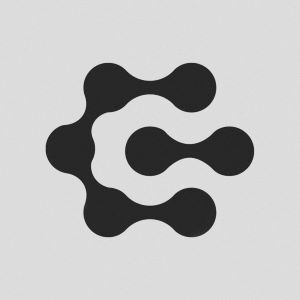

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import scipy.stats as stats
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("/content/students_mentalhealth_formodeling(1).csv")

In [ ]:
df.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group,Grade,Academic_Classification
0,20.0,Female,In a Relationship,Computer Science,3.756,4.0,1.0,2.0,Average,Low,Average,Yes,1.0,High GPA,A,Sophomores
1,21.0,Female,Single,Computer Science,3.706,5.0,3.0,5.0,Average,Average,Average,No,1.0,High GPA,A,Juniors
2,20.0,Female,Single,Computer Science,2.860,3.0,2.0,4.0,Average,Average,High,Yes,1.0,Low GPA,C,Sophomores
3,21.0,Male,In a Relationship,Computer Science,3.910,4.0,3.0,3.0,Poor,High,Average,No,3.0,High GPA,A,Juniors
4,21.0,Female,Single,Others,3.500,3.0,4.0,0.0,Average,Average,High,Yes,5.0,High GPA,B,Juniors


## **Features Encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      7157 non-null   float64
 1   Gender                   7157 non-null   object 
 2   Relationship_Status      7157 non-null   object 
 3   Course                   7157 non-null   object 
 4   CGPA                     7157 non-null   float64
 5   Stress_Level             7157 non-null   float64
 6   Depression_Score         7157 non-null   float64
 7   Anxiety_Score            7157 non-null   float64
 8   Sleep_Quality            7157 non-null   object 
 9   Physical_Activity        7157 non-null   object 
 10  Social_Support           7157 non-null   object 
 11  Family_History           7157 non-null   object 
 12  Financial_Stress         7157 non-null   float64
 13  GPA_Group                7157 non-null   object 
 14  Grade                   

In [ ]:
mapping = {0: 'Low', 1: 'Low', 2: 'Low', 3: 'High', 4: 'High', 5: 'High'}

# Map the original scores to categories
df['Stress_Level'] = df['Stress_Level'].map(mapping)
df['Depression_Score'] = df['Depression_Score'].map(mapping)
df['Anxiety_Score'] = df['Anxiety_Score'].map(mapping)
df['Financial_Stress'] = df['Financial_Stress'].map(mapping)

In [ ]:
df['Stress_Level'].value_counts()

Low     3642
High    3515
Name: Stress_Level, dtype: int64

In [ ]:
df2 = df.copy()

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Encode labels in column 'Gender'.

df2['Gender'] = label_encoder.fit_transform(df2['Gender'])

In [ ]:
# Encode labels in column 'Relationship_Status'.
df2['Relationship_Status'] = label_encoder.fit_transform(df2['Relationship_Status'])

# Making sure that label encoder is encoding data in correct order that as we saw in the data analysis that single people are the most people stressed then married then in a relationship.
for index, label in enumerate(label_encoder.classes_):
    print(f"{label}: {index}")

In a Relationship: 0
Married: 1
Single: 2


In [ ]:
df2['Course']= label_encoder.fit_transform(df2['Course'])
# making sure from correct order.

for index, label in enumerate(label_encoder.classes_):
    print(f"{label}: {index}")

Business: 0
Computer Science: 1
Engineering: 2
Law: 3
Medical: 4
Others: 5


The next 4 features we will encode them manually since that label encoder doesn't correctly map each value according it's level since it encodes according to the alphabetic order.

In [ ]:
# Encode labels in column 'Stress_Level'.

df2['Stress_Level'] = df2['Stress_Level'].map({'Low': 0, 'High': 1})

In [ ]:
# Encode labels in column 'Depression_Score'.

df2['Depression_Score'] = df2['Depression_Score'].map({'Low': 0, 'High': 1})

In [ ]:
# Encode labels in column 'Anxiety_Score'.

df2['Anxiety_Score'] = df2['Anxiety_Score'].map({'Low': 0, 'High': 1})

In [ ]:
# Encode labels in column 'Financial_Stress'.

df2['Financial_Stress'] = df2['Financial_Stress'].map({'Low': 0, 'High': 1})

In [ ]:
# Encode labels in column 'Sleep_Quality'.

df2['Sleep_Quality'] = df2['Sleep_Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

In [ ]:
# Encode labels in column 'Physical_Activity'.

df2['Physical_Activity'] = df2['Physical_Activity'].map({'Low': 0, 'Average': 1, 'High': 2})

In [ ]:
# Encode labels in column 'Social_Support'.

df2['Social_Support'] = df2['Social_Support'].map({'Low': 0, 'Average': 1, 'High': 2})

In [ ]:
# Encode labels in column 'Academic_Classification'.

df2['Academic_Classification'] = df2['Academic_Classification'].map({
'Freshmen': 0,
'Juniors': 2,
'Masters': 4,
'Seniors': 3,
'Sophomores': 1})

In [ ]:
df2['Academic_Classification'].value_counts()

4    1744
3    1636
2    1522
0    1473
1     782
Name: Academic_Classification, dtype: int64

In [ ]:
# Encode labels in column 'Family_History'.

df2['Family_History']= label_encoder.fit_transform(df2['Family_History'])

In [ ]:
# Encode labels in column 'GPA_Group'.

df2['GPA_Group']= label_encoder.fit_transform(df2['GPA_Group'])

In [ ]:
# Encode labels in column 'Grade'.
df2['Grade']= label_encoder.fit_transform(df2['Grade'])

# making sure from their order.
for index, label in enumerate(label_encoder.classes_):
    print(f"{label}: {index}")

A: 0
B: 1
C: 2
D: 3
F: 4


Data before encoding.

In [ ]:
df.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group,Grade,Academic_Classification
0,20.0,Female,In a Relationship,Computer Science,3.756,High,Low,Low,Average,Low,Average,Yes,Low,High GPA,A,Sophomores
1,21.0,Female,Single,Computer Science,3.706,High,High,High,Average,Average,Average,No,Low,High GPA,A,Juniors
2,20.0,Female,Single,Computer Science,2.860,High,Low,High,Average,Average,High,Yes,Low,Low GPA,C,Sophomores
3,21.0,Male,In a Relationship,Computer Science,3.910,High,High,High,Poor,High,Average,No,High,High GPA,A,Juniors
4,21.0,Female,Single,Others,3.500,High,High,Low,Average,Average,High,Yes,High,High GPA,B,Juniors


Data with Encoding.

In [ ]:
df2.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group,Grade,Academic_Classification
0,20.0,0,0,1,3.756,1,0,0,1,0,1,1,0,0,0,1
1,21.0,0,2,1,3.706,1,1,1,1,1,1,0,0,0,0,2
2,20.0,0,2,1,2.860,1,0,1,1,1,2,1,0,1,2,1
3,21.0,1,0,1,3.910,1,1,1,0,2,1,0,1,0,0,2
4,21.0,0,2,5,3.500,1,1,0,1,1,2,1,1,0,1,2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      7157 non-null   float64
 1   Gender                   7157 non-null   int64  
 2   Relationship_Status      7157 non-null   int64  
 3   Course                   7157 non-null   int64  
 4   CGPA                     7157 non-null   float64
 5   Stress_Level             7157 non-null   int64  
 6   Depression_Score         7157 non-null   int64  
 7   Anxiety_Score            7157 non-null   int64  
 8   Sleep_Quality            7157 non-null   int64  
 9   Physical_Activity        7157 non-null   int64  
 10  Social_Support           7157 non-null   int64  
 11  Family_History           7157 non-null   int64  
 12  Financial_Stress         7157 non-null   int64  
 13  GPA_Group                7157 non-null   int64  
 14  Grade                   

* Now our dataset is ready for modeling phase.

# **Modeling**

## I. Clustering Analysis

Visualizing pairplot to find relationships between each column and identify patterns among them.

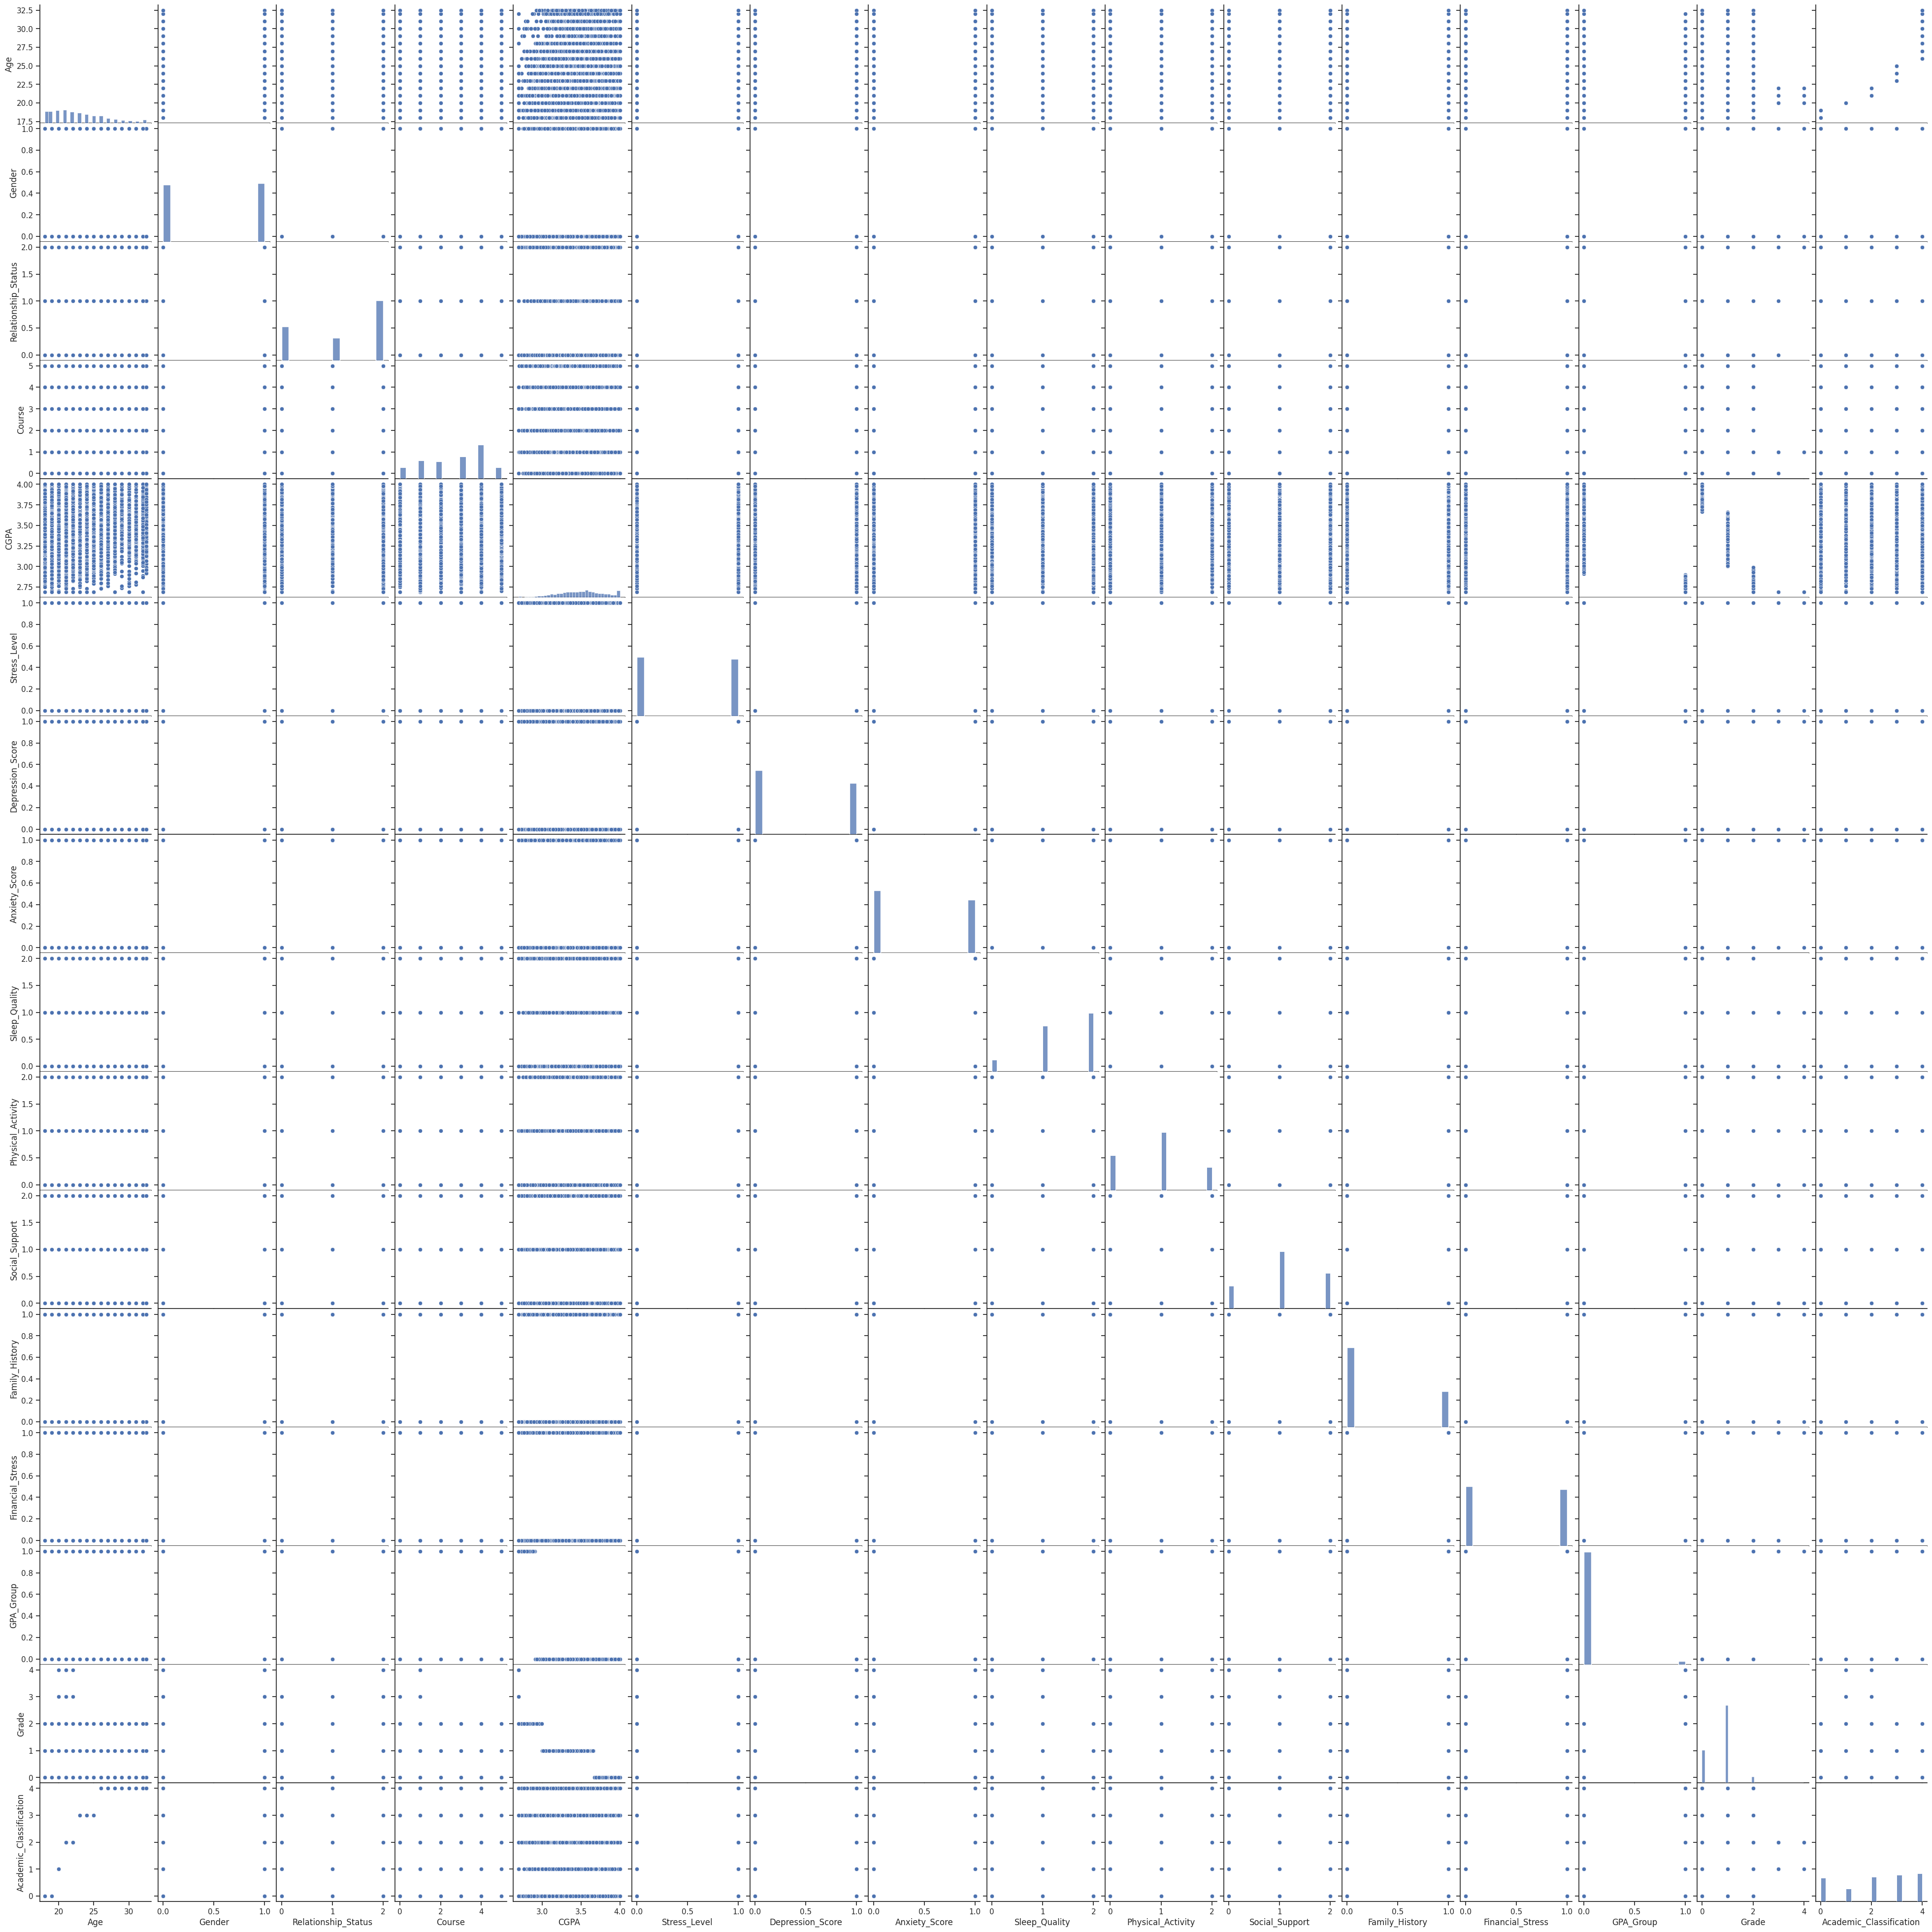

In [ ]:
sns.set(style="ticks")

# Create a pairplot with hue set to the 'Distance' column
sns.pairplot(df2)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.06, hspace=0.001)

# Show the plot
plt.show()


* Analyzing the pair plot reveals the absence of significant relationships or patterns between columns. No discernible patterns or strong correlations are evident among the variables.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df2.drop(['Age','CGPA','Gender','Relationship_Status','Family_History','Course','Academic_Classification','GPA_Group','Social_Support','Sleep_Quality','Physical_Activity','Anxiety_Score','Depression_Score'],axis=1))

# # Apply PCA
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(scaled_data)

# # Visualize the data
# plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Plot')
# plt.show()


In [ ]:
# pca.explained_variance_ratio_

Utilizing PCA to visualize the relationship among selected features and their distribution, aiding in determining the optimal number of clusters.

We Determined the features we will use for clustering.
1- cgpa and grades

2- stress

3-anxiety and depression scores

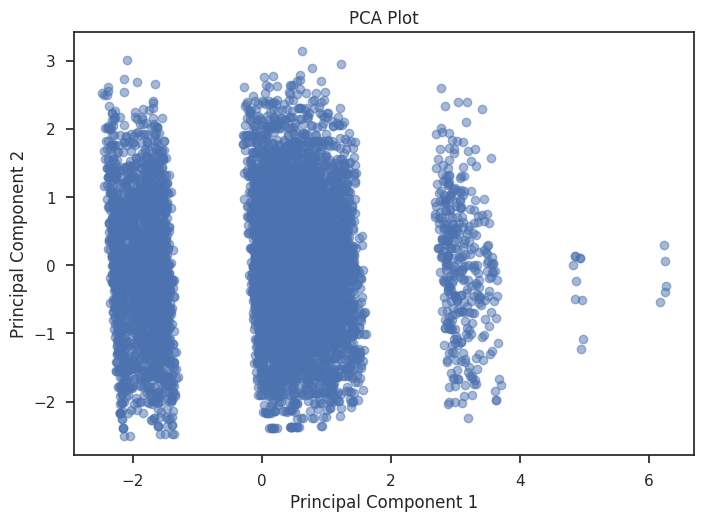

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2.drop(['Gender','Relationship_Status','Family_History','Course','Academic_Classification','GPA_Group','Social_Support','Sleep_Quality'],axis=1))

# Apply PCA
pca2 = PCA(n_components=2)
pca_data2 = pca2.fit_transform(scaled_data)

# Visualize the data
plt.scatter(pca_data2[:, 0], pca_data2[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()


* PCA analysis suggests that our data is likely to be clustered into four distinct groups.

----

Visualizing the K-Elbow Method to determine the optimal number of clusters, confirming if the ideal choice is indeed 4 or any other based on within-cluster sum of squares (WSS) scores.

### 1. KMeans Algorithm

<function matplotlib.pyplot.show(close=None, block=None)>

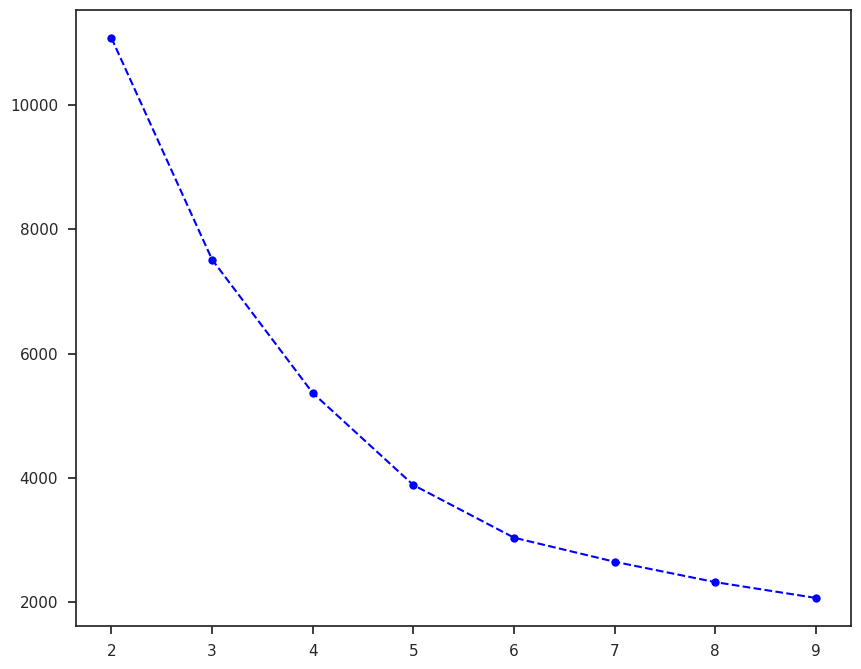

In [ ]:
from sklearn.cluster import KMeans

wss = []
for i in range(2,10):
  kmeans_pca = KMeans(n_clusters=i,init='k-means++' ,random_state=42)
  kmeans_pca.fit(pca_data2)
  wss.append(kmeans_pca.inertia_)


plt.figure(figsize=(10,8))
plt.plot(range(2,10),wss,marker='o',linestyle='--',color='blue')
plt.show

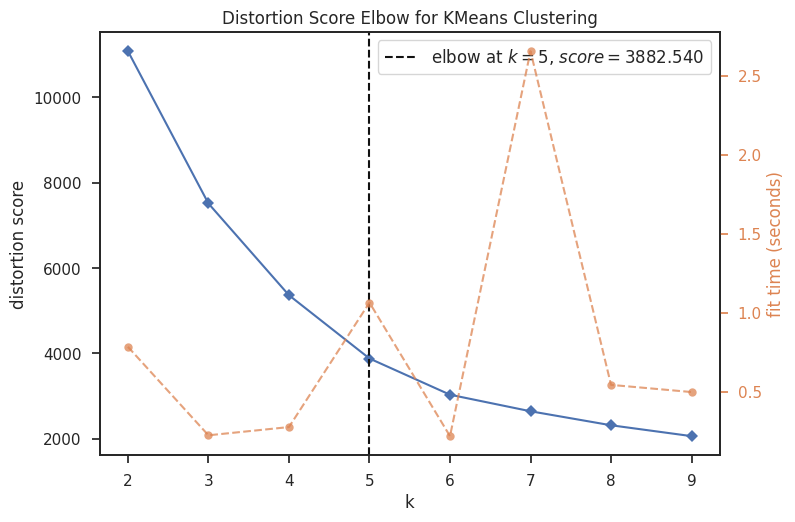

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(init='k-means++', max_iter=1000000,random_state=42)
visualizer=KElbowVisualizer(kmeans,k=(2,10))
visualizer.fit(pca_data2)
visualizer.poof()
plt.show()

* The K-Elbow method suggests that 5 clusters are optimal, but considering the complexity and interpretability of identifying these students, we opt for 4 clusters instead.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhoutte_list=[]
davies_list=[]
k_list=[]
for k in range(2,12):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000000,random_state=42)
  model= kmeans.fit_predict(pca_data)
  cluster_labels = kmeans.labels_
  silhoutte_list.append(np.round(silhouette_score(pca_data,cluster_labels),4))
  davies_list.append(np.round(davies_bouldin_score(pca_data,cluster_labels),4))
  k_list.append(k)
  # print(f'At {k} Clusters the Silhouette Score is {np.round(silhouette_score(data,cluster_labels),3)} and Davies Bouldin Score is {np.round(davies_bouldin_score(data,cluster_labels),3)} ')


evaluation_metric = pd.DataFrame({'Number of clusters':k_list,'Silhouette Score':silhoutte_list,'Davies Bouldin Score':davies_list})
evaluation_metric

,Number of clusters,Silhouette Score,Davies Bouldin Score
0,2,0.4698,1.0481
1,3,0.5404,0.7861
2,4,0.6612,0.5753
3,5,0.7090,0.4924
4,6,0.7583,0.4464
5,7,0.8364,0.3632
6,8,0.9252,0.1976
7,9,0.9466,0.1922
8,10,0.9651,0.1772
9,11,0.9832,0.1530


In [ ]:
kmeans_pca = KMeans(n_clusters = 4,init = 'k-means++' ,random_state = 42)

kmeans_pca.fit(pca_data2)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df_pca_clusters = pd.concat([df.reset_index(drop=True),pd.DataFrame(pca_data2)],axis=1)

# df_pca_clusters ['PCA Clusters'] = kmeans_pca.labels_
df_pca_clusters ['PCA Clusters 2'] = kmeans_pca.labels_

In [ ]:
df_pca_clusters.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group,Grade,Academic_Classification,0,1,PCA Clusters 2
0,20.0,Female,In a Relationship,Computer Science,3.756,High,Low,Low,Average,Low,Average,Yes,Low,High GPA,A,Sophomores,-1.614230,-2.011726,2
1,21.0,Female,Single,Computer Science,3.706,High,High,High,Average,Average,Average,No,Low,High GPA,A,Juniors,-1.494389,0.003157,2
2,20.0,Female,Single,Computer Science,2.860,High,Low,High,Average,Average,High,Yes,Low,Low GPA,C,Sophomores,3.119157,-0.217848,3
3,21.0,Male,In a Relationship,Computer Science,3.910,High,High,High,Poor,High,Average,No,High,High GPA,A,Juniors,-1.967440,0.249692,2
4,21.0,Female,Single,Others,3.500,High,High,Low,Average,Average,High,Yes,High,High GPA,B,Juniors,0.383374,-1.185183,1


In [ ]:
clusters_grouped = df_pca_clusters.groupby('PCA Clusters 2').agg({'Age': 'mean',
                                                 'CGPA': 'mean',
                                                 'Grade': lambda x: x.mode()[0],
                                                 'Stress_Level': lambda x: x.mode()[0],
                                                'Depression_Score': lambda x: x.mode()[0],

                                              'Academic_Classification': lambda x: x.mode()[0],
                                              'Financial_Stress': lambda x: x.mode()[0],

                                                 # Add more columns as needed
                                                })
clusters_grouped

,Age,CGPA,Grade,Stress_Level,Depression_Score,Academic_Classification,Financial_Stress
PCA Clusters 2,,,,,,,
0,24.355035,3.390279,B,Low,High,Masters,Low
1,21.552163,3.383686,B,High,Low,Freshmen,High
2,23.028401,3.835462,A,Low,Low,Masters,Low
3,22.656836,2.873005,C,High,Low,Seniors,High


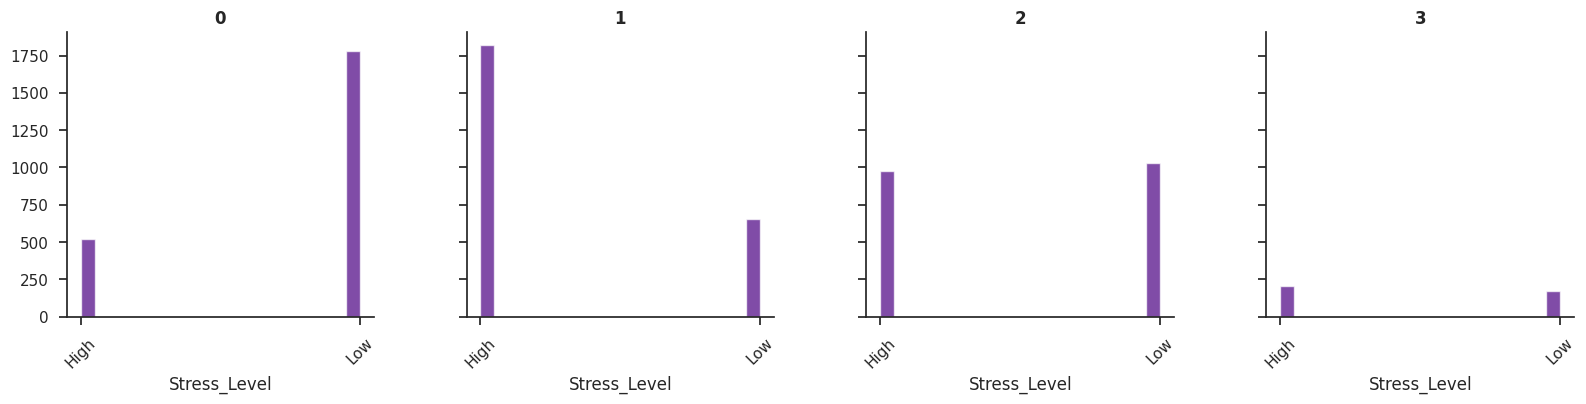

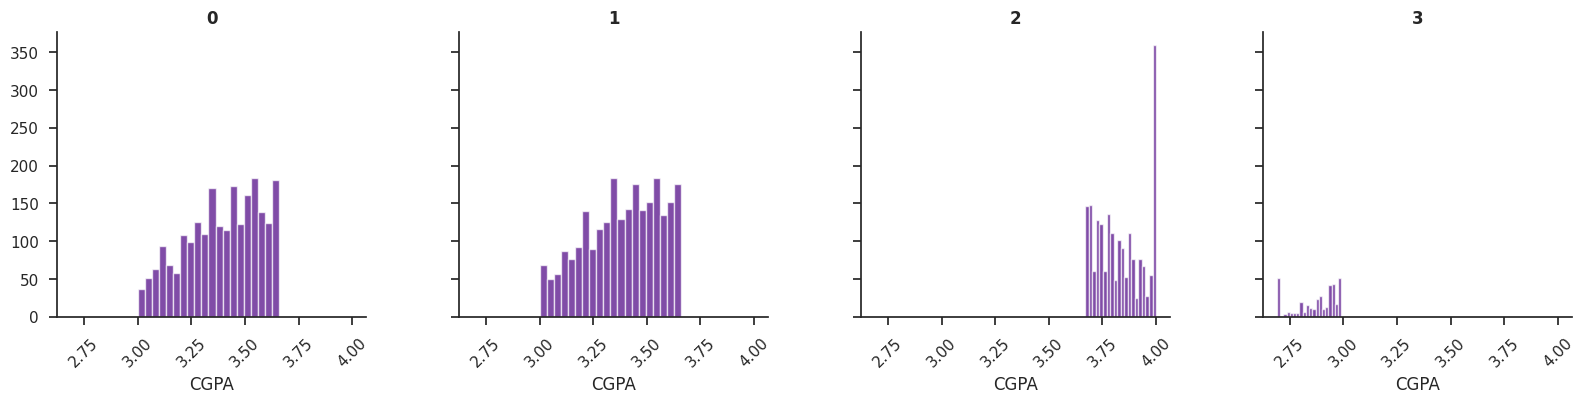

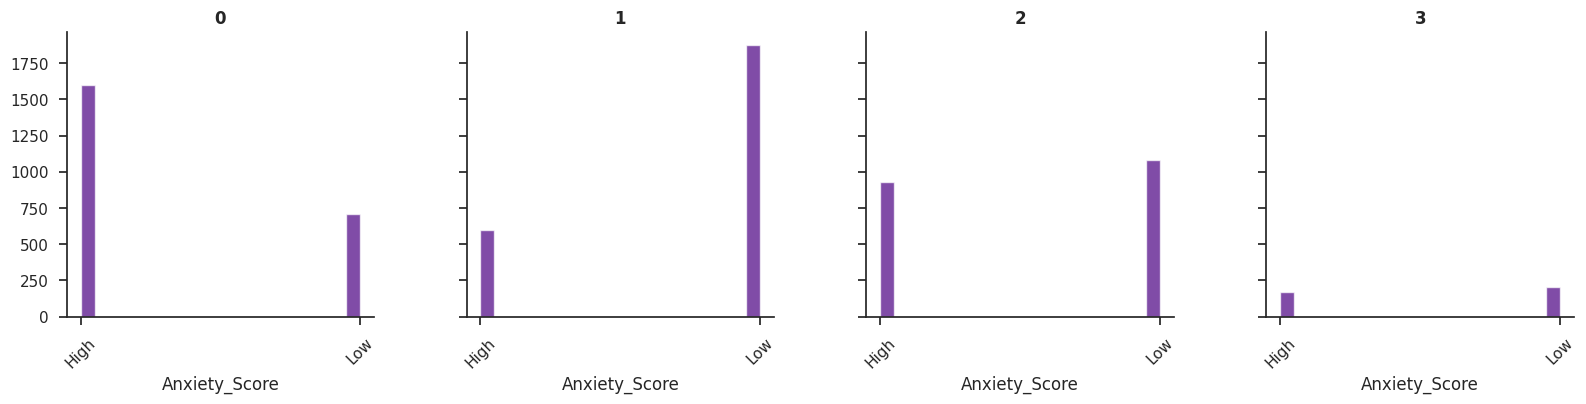

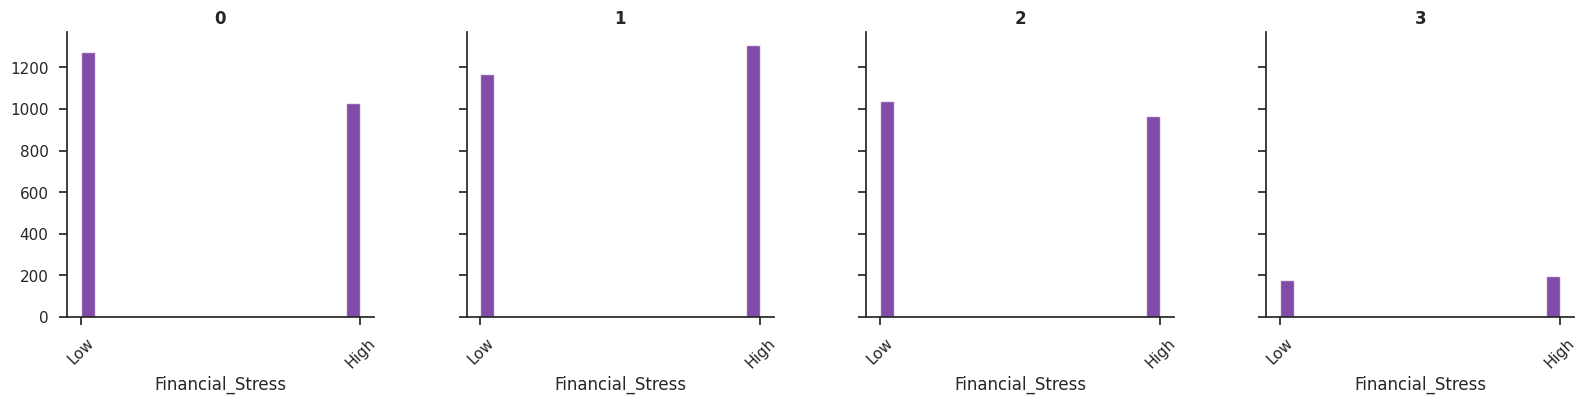

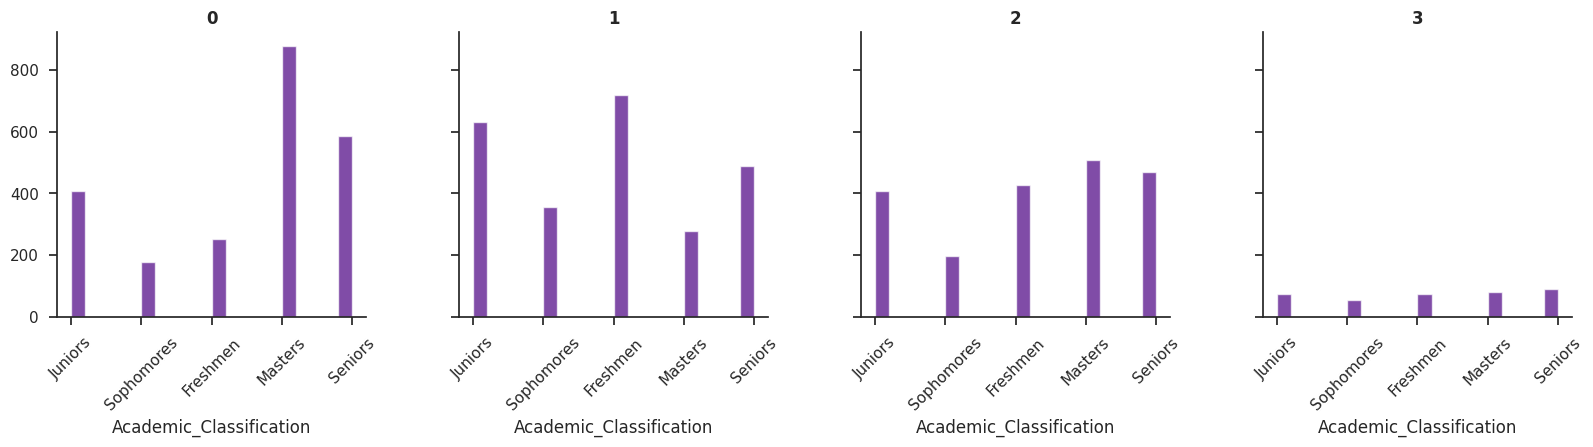

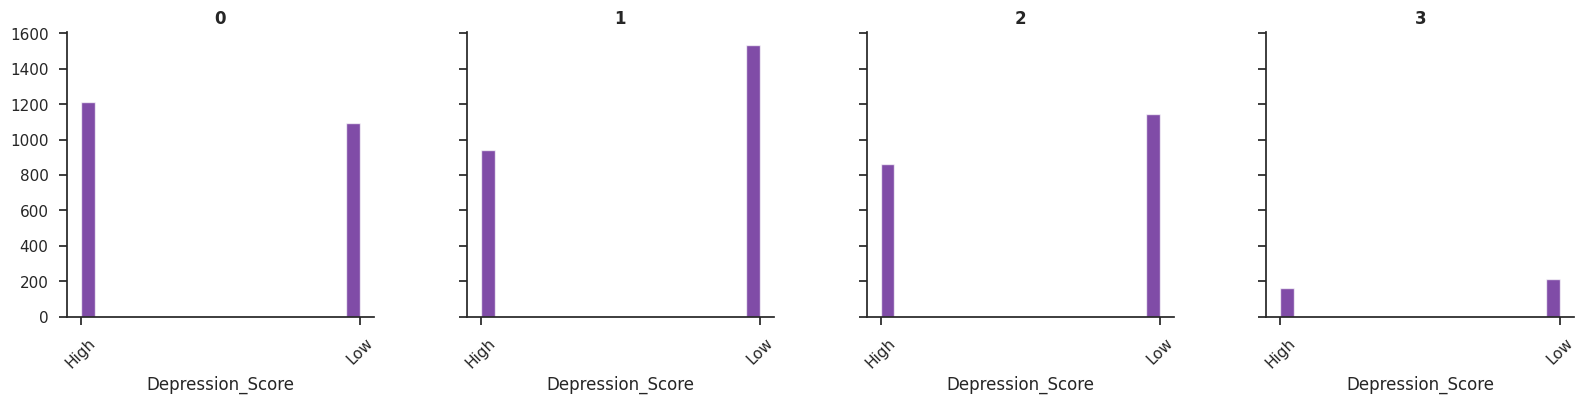

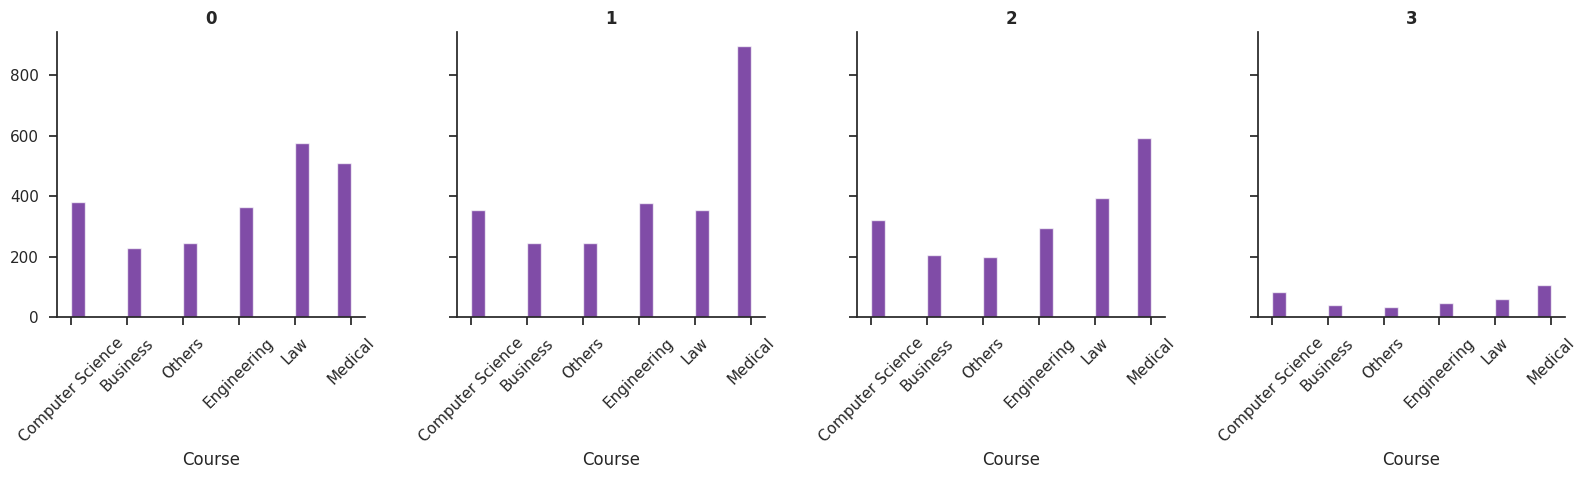

In [ ]:
sns.set(style="ticks")


for c in df_pca_clusters[['Stress_Level','CGPA','Anxiety_Score','Financial_Stress','Academic_Classification','Depression_Score','Course']]:
    grid = sns.FacetGrid(df_pca_clusters, col='PCA Clusters 2', col_wrap=5, height=4, aspect=1)

    # Plot histogram for each cluster
    grid.map(plt.hist, c, bins=20, color='indigo', alpha=0.7)

    # Adjust spacing between subplots
    grid.fig.subplots_adjust(wspace=0.3, hspace=0.3)

    # Set title for each subplot
    grid.set_titles(col_template="{col_name}", fontweight='bold', fontsize=12)

    # Rotate x-axis labels
    for ax in grid.axes.flat:
        ax.tick_params(axis='x', rotation=45)

    plt.show()


**Cluster 0 :**
* Cluster 0 primarily consists of students with average grades ranging from B, representing the majority of students in the dataset. Interestingly, these students do not report high stress levels but exhibit elevated anxiety and depression scores. This suggests that external factors beyond academic stress may be influencing their mental well-being.

* These students are typically seniors or pursuing master's or higher degrees, indicating a stage of education where life events may take precedence over academic challenges. Additionally, the prevalence of Law courses among students in this cluster may contribute to higher depression and anxiety scores, given the nature of the subject matter and its focus on crimes and legal issues.

* Cluster 0 represents a group of students with average academic performance, facing elevated levels of anxiety and depression possibly due to external factors. The presence of Law courses may further exacerbate mental health challenges among students in this cluster.

----

**Cluster 1:**
* Cluster 1 consists of students with average grades ranging from B, similar to Cluster 0. However, they experience higher stress levels, including financial stress. Anxiety and depression scores are also elevated, indicating additional external pressures.

* These students are predominantly first-year students, such as freshmen and sophomores, suggesting that the transition to university life and academic demands may contribute to their higher stress levels.

* Medical and engineering courses are prevalent among students in Cluster 1, aligning with their higher stress levels. The demanding nature of these disciplines likely exacerbates stress among students in this cluster.

----

**Cluster 2:**
 * Cluster 2 comprises students with high academic achievements, typically maintaining A grades with GPAs ranging from 3.5 to 4, with 4 GPA being the most common. Interestingly, this group of students exhibits a neutral stance across various factors. They display both low and high levels of stress and financial stress, as well as anxiety and depression scores.

 * While some students in this cluster may experience high stress factors, overall, they do not seem to be as challenged by stressors compared to students with lower GPAs or those in specific courses. Despite their high academic performance, they appear to have a balanced approach to stress management.

---

**Cluster 3 :**
 * Cluster 3 represents a small yet significant portion of students who face significant academic and personal challenges. These students experience higher levels of stress, financial stress, and anxiety scores compared to other clusters. Their academic performance is notably low, with grades falling below 2.5 GPA, indicating academic struggles.

 * This cluster is characterized by a mix of seniors and freshmen. Freshmen, in their first year of university, often encounter new challenges and environments, contributing to increased stress and anxiety, particularly when facing academic difficulties. Similarly, seniors, in their final years of study, face numerous challenges such as graduation projects and life transitions, which can exacerbate stress levels.

 * Medical and computer science students are prevalent within this cluster, reflecting the demanding nature of these fields and the additional stressors associated with academic performance.


### 2. Hierarichal Clustering Algorithm.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage,fcluster
from scipy.cluster.hierarchy import dendrogram

# Use the linkage() function
distance_matrix = linkage(pca_data2, method='ward', metric='euclidean')

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')  # You can adjust 'n_clusters' and 'linkage' as needed

# Fit the AgglomerativeClustering model to your data

predicted_labels = agg_cluster.fit(pca_data2)

In [ ]:
df_pca_clusters ['PCA Clusters Hirerachial'] = predicted_labels.labels_

In [ ]:
clusters_grouped = df_pca_clusters.groupby('PCA Clusters Hirerachial').agg({'Age': 'mean',
                                                 'CGPA': 'mean',
                                                 'Grade': lambda x: x.mode()[0],
                                                 'Stress_Level': lambda x: x.mode()[0],
                                                'Depression_Score': lambda x: x.mode()[0],
                                                'Anxiety_Score': lambda x: x.mode()[0],
                                              'Financial_Stress': lambda x: x.mode()[0],

                                                 # Add more columns as needed
                                                })
clusters_grouped

,Age,CGPA,Grade,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress
PCA Clusters Hirerachial,,,,,,,
0,23.028401,3.835462,A,Low,Low,Low,Low
1,21.631579,3.359244,B,High,Low,Low,High
2,24.379521,3.418896,B,Low,High,High,Low
3,22.656836,2.873005,C,High,Low,Low,High


### 3. DBSCAN Algorithm.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

In [ ]:
param_grid = {
    'eps': [0.1,18,19,20, 0.2, 0.3,0.9,1,0.96,0.65,0.25,1,2,3,1.5,5,20,30,5,6,8,9,4,1.9,1.8,2.5,2.6,2.4,3,3.5,3.9,0.01,0.001],
    'min_samples': np.arange(2,10)
}

best_silhouette_score = -1  # Initialize with a lower score
  # Initialize with a higher score
best_params_silhouette = None


# Iterate through parameter combinations
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    dbscan.fit(pca_data)

    # Calculate silhouette score for current parameters
    labels = dbscan.labels_
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        silhouette = silhouette_score(pca_data, labels)

        # Update best parameters if the silhouette score is higher
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_params_silhouette = params






print("Best Parameters for Silhouette Score:", best_params_silhouette)
print("Best Silhouette Score:", best_silhouette_score)


Best Parameters for Silhouette Score: {'eps': 0.1, 'min_samples': 2}
Best Silhouette Score: 0.9996962693794488


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=2)

dbscan.fit(pca_data2)

dbscan_labels = dbscan.labels_

In [ ]:
dbscan_labels

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
df_pca_clusters ['PCA Clusters Dbscan'] = dbscan_labels

In [ ]:
df_pca_clusters ['PCA Clusters Dbscan'].value_counts()

 2     4651
 0     1934
 1      192
-1       88
 3       40
 22      24
 31      17
 21      16
 5       12
 24      10
 10       8
 27       8
 17       7
 20       6
 12       6
 41       6
 26       6
 39       6
 32       6
 6        6
 25       5
 51       5
 47       5
 38       5
 44       4
 11       4
 42       4
 36       3
 35       3
 46       3
 34       3
 45       3
 29       3
 54       3
 19       3
 16       3
 15       3
 14       3
 53       3
 56       2
 49       2
 48       2
 50       2
 52       2
 55       2
 28       2
 43       2
 40       2
 37       2
 33       2
 30       2
 23       2
 18       2
 13       2
 9        2
 8        2
 7        2
 4        2
 57       2
Name: PCA Clusters Dbscan, dtype: int64

* After experimenting with different values for epsilon and min_samples, DBSCAN is not suitable for clustering this data. It resulted in 57 clusters, each containing a very small number of samples.


## II.Classification

In [ ]:
df_pca_clusters2 = pd.concat([df2.reset_index(drop=True),pd.DataFrame(pca_data2)],axis=1)

# df_pca_clusters ['PCA Clusters'] = kmeans_pca.labels_
df_pca_clusters2 ['PCA Clusters 2'] = kmeans_pca.labels_
df_pca_clusters2.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group,Grade,Academic_Classification,0,1,PCA Clusters 2
0,20.0,0,0,1,3.756,1,0,0,1,0,1,1,0,0,0,1,-1.614230,-2.011726,2
1,21.0,0,2,1,3.706,1,1,1,1,1,1,0,0,0,0,2,-1.494389,0.003157,2
2,20.0,0,2,1,2.860,1,0,1,1,1,2,1,0,1,2,1,3.119157,-0.217848,3
3,21.0,1,0,1,3.910,1,1,1,0,2,1,0,1,0,0,2,-1.967440,0.249692,2
4,21.0,0,2,5,3.500,1,1,0,1,1,2,1,1,0,1,2,0.383374,-1.185183,1


In [ ]:
X = df_pca_clusters2.loc[:,:'Academic_Classification'].values
y = df_pca_clusters2['PCA Clusters 2'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
##from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_auc_score,classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
from sklearn.model_selection import GridSearchCV

### Functions

In [ ]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    '''
    This function optimize the hyperparameters for a classifier by searching over a specified hyperparameter grid. It uses
    GridSearchCV to evaluate different combinations of hyperparameters, and selects the combination with the highest accuracy score.
    The function returns the best classifier with the optimal hyperparameters.
    '''

    # 10 Fold Cross Validation
    cv = 10

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='weighted'),
                                recall_score(y_test, y_pred, average='weighted'),
                                f1_score(y_test, y_pred, average='weighted'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Blues', ax=ax)
    ax.set_title('Confusion Matrix for Test Data')
    ax.grid(False)

### `Logistic Regression`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1642
           1       0.96      0.99      0.97      1711
           2       1.00      1.00      1.00      1402
           3       1.00      0.73      0.84       254

    accuracy                           0.97      5009
   macro avg       0.98      0.92      0.95      5009
weighted avg       0.97      0.97      0.97      5009


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       662
           1       0.95      0.98      0.96       762
           2       1.00      1.00      1.00       605
           3       1.00      0.73      0.84       119

    accuracy                           0.97      2148
   macro avg       0.98      0.92      0.94 

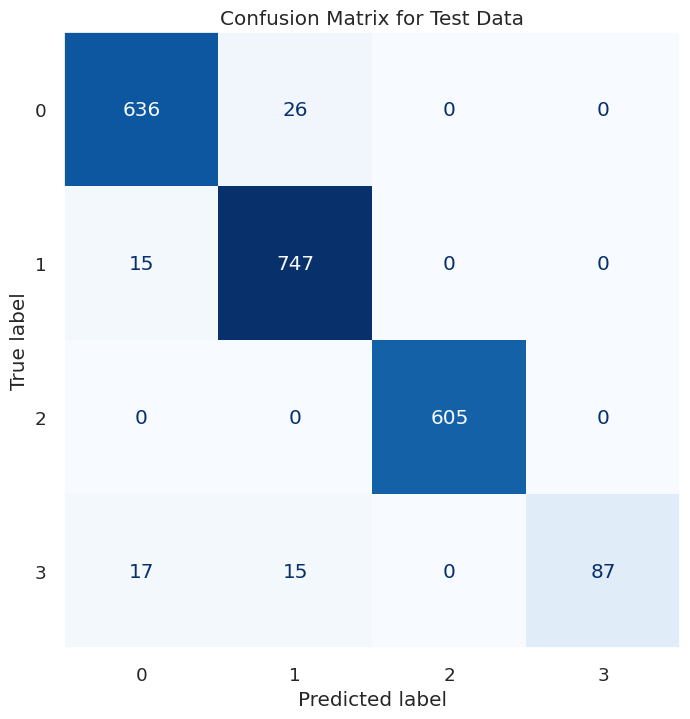

In [ ]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=0.01,max_iter=18)
#lr = LogisticRegression()

# lr_params = {'penalty': ['l1', 'l2'],'C':c_vals}
lr.fit(X_train, y_train)
model_evaluation(lr,X_train,X_test,y_train,y_test,"logistic regression")

* logistic regression in normal conditions give nearly 100% accuracy but we tuned in at's hyper parametters a little by decreasing the C value and decreasing no. of iterations to give us reasonable accuracy as 97%.

### KNN

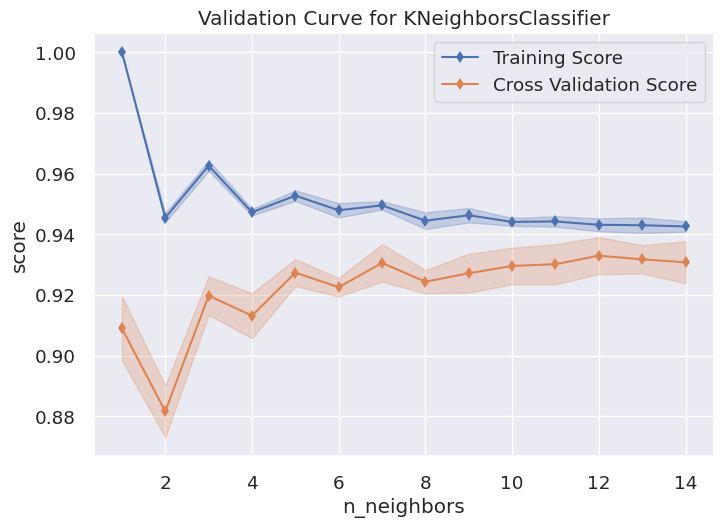

<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>

In [ ]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1, 15)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Create the validation curve visualizer
visualizer = ValidationCurve(
    knn, param_name="n_neighbors", param_range=k_values,
    cv=5, scoring="accuracy", n_jobs=1
)

# Fit the visualizer
visualizer.fit(X_train, y_train)

# Finalize and display the figure
visualizer.poof()


we can notice here that as the k increases as the validation score becomes closer to the training..but this can go till infinity and that doesn't make sense, so we will pick the most good k we can see here as 15.

In [ ]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

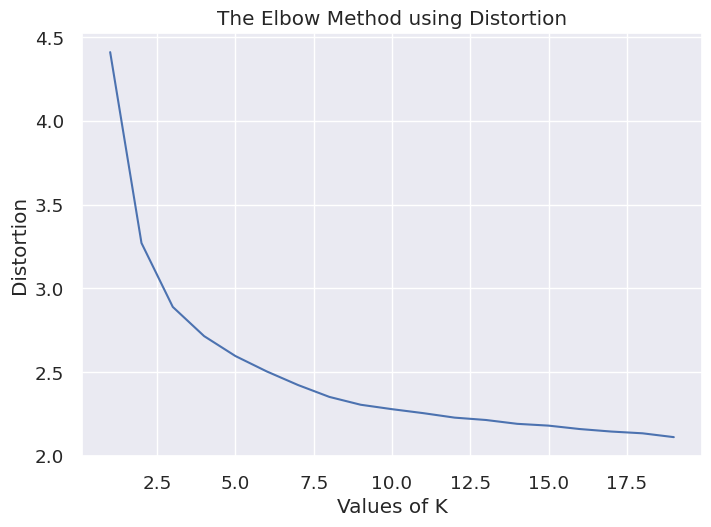

In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

the elbow method shows us here k as value of 3.

In [ ]:
# Define the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1, 15),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the grid search object
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.9379121876127865



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1642
           1       1.00      1.00      1.00      1711
           2       1.00      1.00      1.00      1402
           3       1.00      1.00      1.00       254

    accuracy                           1.00      5009
   macro avg       1.00      1.00      1.00      5009
weighted avg       1.00      1.00      1.00      5009


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       662
           1       0.91      0.96      0.93       762
           2       1.00      1.00      1.00       605
           3       1.00      0.70      0.82       119

    accuracy                           0.94      2148
   macro avg       0.96      0.89      0.92 

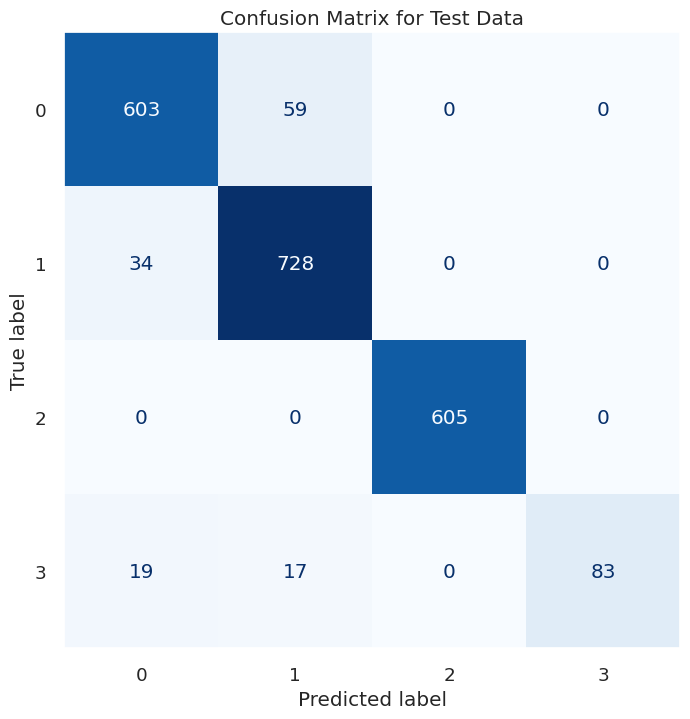

In [ ]:
knn_clf = KNeighborsClassifier(algorithm='auto',n_neighbors=9,p=1,weights='distance')

# Train the KNN classifier
knn_clf.fit(X_train, y_train)
model_evaluation(knn_clf,X_train,X_test,y_train,y_test,"knn")

after trying the validation score and elbow method their results weren't very satisfying, so we choose to try grid search and indeed it gave us the best results with test accuracy 94% and 100% training accuracy.

### `Support Vector Machine`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1642
           1       0.99      0.99      0.99      1711
           2       1.00      1.00      1.00      1402
           3       1.00      1.00      1.00       254

    accuracy                           0.99      5009
   macro avg       0.99      0.99      0.99      5009
weighted avg       0.99      0.99      0.99      5009


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       662
           1       0.97      0.98      0.98       762
           2       1.00      1.00      1.00       605
           3       1.00      1.00      1.00       119

    accuracy                           0.98      2148
   macro avg       0.99      0.99      0.99 

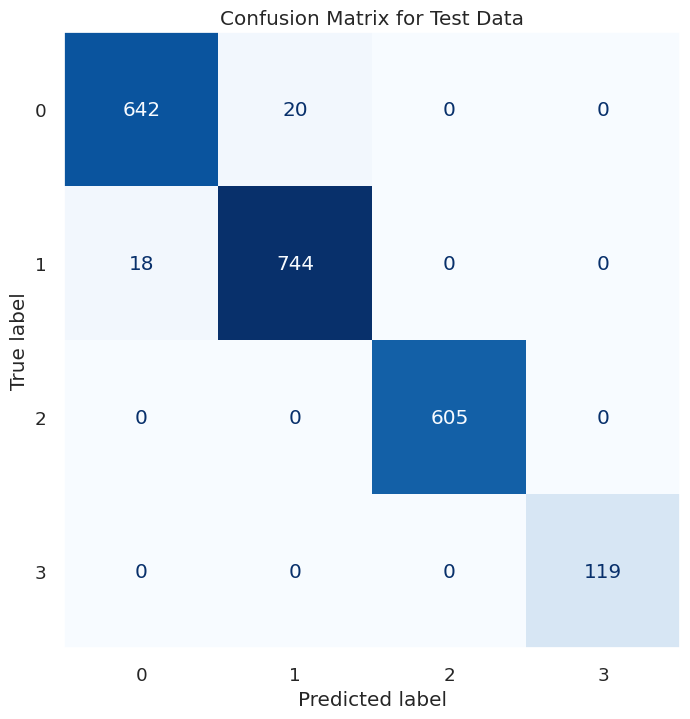

In [ ]:
# Create the SVC classifier
svm=SVC()

# Train the SVC classifier
svm.fit(X_train, y_train)
model_evaluation(X_test=X_test,X_train=X_train,clf=svm,y_test=y_test,y_train=y_train,model_name="svm")

the normal svm also gives us accuracy of 98%, so no reason to tune it, and as we can see from the confusion matrix, it only missclassified data from first 2 clusters only but the other two clusters it classify them perfectly.

### `Decision Tree`

In [ ]:
# dt = DecisionTreeClassifier(max_features='log2',ccp_alpha=0.001,max_depth=7,criterion='gini')
dt = DecisionTreeClassifier()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1642
           1       1.00      1.00      1.00      1711
           2       1.00      1.00      1.00      1402
           3       1.00      1.00      1.00       254

    accuracy                           1.00      5009
   macro avg       1.00      1.00      1.00      5009
weighted avg       1.00      1.00      1.00      5009


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       662
           1       0.99      0.99      0.99       762
           2       1.00      1.00      1.00       605
           3       0.98      1.00      0.99       119

    accuracy                           0.99      2148
   macro avg       0.99      1.00      0.99 

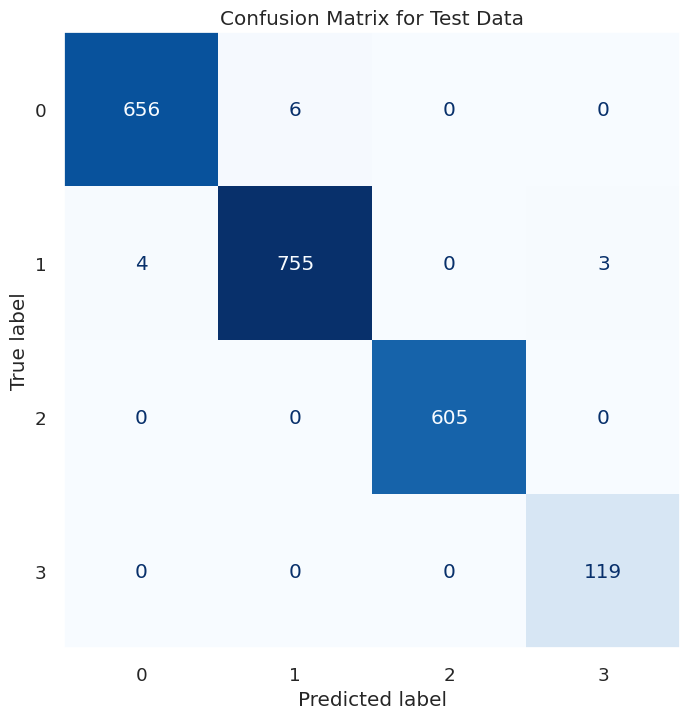

In [ ]:
dt.fit(X_train, y_train)

model_evaluation(dt,X_train,X_test,y_train,y_test,'desicion tree')

we can see here that decision tree works very good for the data with accuracy 99%, but we can also notice from the confusion matrix that all the missclassified rows are from cluster no 0,1 same as the SVM.

### `Random Forest`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1642
           1       1.00      1.00      1.00      1711
           2       1.00      1.00      1.00      1402
           3       1.00      1.00      1.00       254

    accuracy                           1.00      5009
   macro avg       1.00      1.00      1.00      5009
weighted avg       1.00      1.00      1.00      5009


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       662
           1       0.97      0.99      0.98       762
           2       1.00      1.00      1.00       605
           3       1.00      1.00      1.00       119

    accuracy                           0.98      2148
   macro avg       0.99      0.99      0.99 

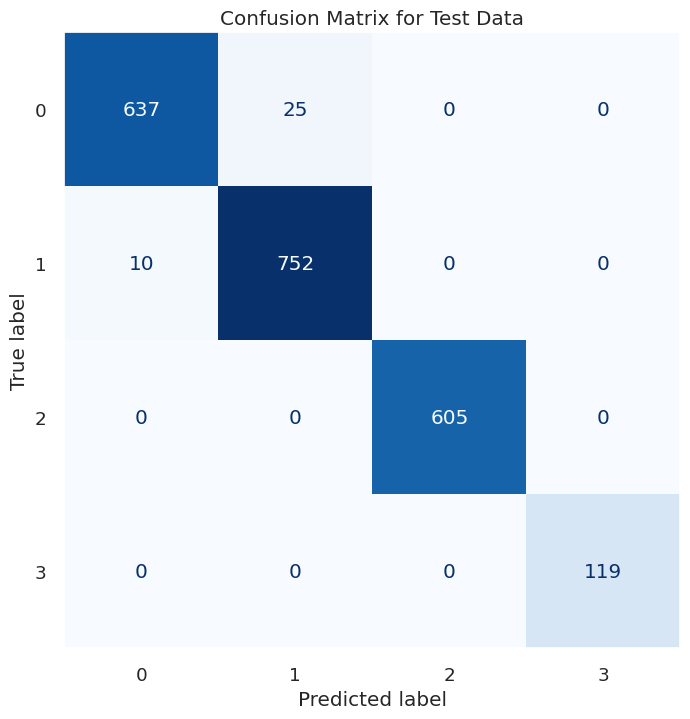

In [ ]:
rf = RandomForestClassifier(max_depth=100,max_features='sqrt',min_samples_leaf=1,min_samples_split=10,n_estimators=200)
rf_params = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf.fit(X_train, y_train)
model_evaluation(rf,X_train,X_test,y_train,y_test,'random forest')

we can also notice the same pattern.

### `Xtreme Grandient Boosting Classifier`


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1642
           1       1.00      1.00      1.00      1711
           2       1.00      1.00      1.00      1402
           3       1.00      1.00      1.00       254

    accuracy                           1.00      5009
   macro avg       1.00      1.00      1.00      5009
weighted avg       1.00      1.00      1.00      5009


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       662
           1       1.00      0.99      0.99       762
           2       1.00      1.00      1.00       605
           3       1.00      1.00      1.00       119

    accuracy                           1.00      2148
   macro avg       1.00      1.00      1.00 

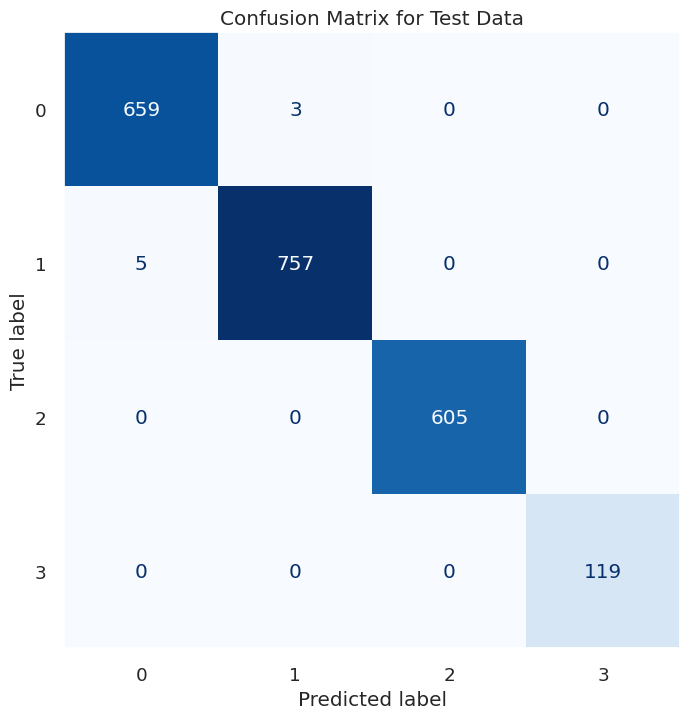

In [ ]:
# xgb = XGBClassifier(min_child_weight=1,gamma=0.5,subsample=0.6,colsample_bytree=1.0,max_depth=3)
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
model_evaluation(xgb,X_train,X_test,y_train,y_test,"xgb")


this one is simillar to logistic regression eith nearly 100% accuracy.

### Conclusion

* logistic regression and XGB almost give us 100% test accuracy which maybe overfitting although the training accuracy is also 100%, but these models can't be considered generalized.

* SVM, decision tree, and random forest gave us more reasonable accuracies, but the best one in my opinion is SVM, because it's not so perfect, so we can consider it generalized.
* KNN doesn't work very good with our data because it's a little bit of a basic model and also it's not very good with so much dimensions, but also it's accuracy is not very bad it also can be considered generalized.

-----

# **Credits :**

This notebook is created by [Connect X](https://www.linkedin.com/company/connectx23/)
AI team.

-------------------------------------------

###**Directed by :**

AI team director [Ammar Thabet](https://www.linkedin.com/in/ammar-thabett/)

###**Team leaders :**

- [Yomna Mohammed Bassam](https://www.linkedin.com/in/yomna-muhammed-bassam-b964a6270)

- [Habiba Nasser](www.linkedin.com/in/habiba-naser)

###**Team members :**

- [Hagar Waleed](https://www.linkedin.com/in/hagar-waleed-b3a511247/)

- [Nour Sameh]()

- [Julia Joseph Nabil](https://www.linkedin.com/in/julia-joseph-b91a85210?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)

- [Ziad Ashraf Ali Ahmed](https://www.linkedin.com/in/ziad-ashraf-93a040255/)


- [David Magdy Nagib](https://www.linkedin.com/in/david-magdy-nagib)

- [Aley Amr](https://www.linkedin.com/in/aley-amr-3002b3242)
